# Watermarking images

[Watermarking images with OpenCV and Python
](https://www.pyimagesearch.com/2016/04/25/watermarking-images-with-opencv-and-python/)

In [19]:
import os
os.environ["OPENBLAS_CORETYPE"] ="Skylake"
os.getenv("OPENBLAS_CORETYPE")

import numpy as np
import cv2
from PIL import Image

In [20]:
watermark = cv2.imread('img/watermark/pyimagesearch_watermark.png', cv2.IMREAD_UNCHANGED)
(wH, wW) = watermark.shape[:2]


In [24]:
# split the watermark into its respective Blue, Green, Red, and
# Alpha channels; then take the bitwise AND between all channels
# and the Alpha channels to construct the actaul watermark
# NOTE: I'm not sure why we have to do this, but if we don't,
# pixels are marked as opaque when they shouldn't be
def fix_watermark():
	(B, G, R, A) = cv2.split(watermark)
	B = cv2.bitwise_and(B, B, mask=A)
	G = cv2.bitwise_and(G, G, mask=A)
	R = cv2.bitwise_and(R, R, mask=A)
	return cv2.merge([B, G, R, A])
    
watermark = fix_watermark()

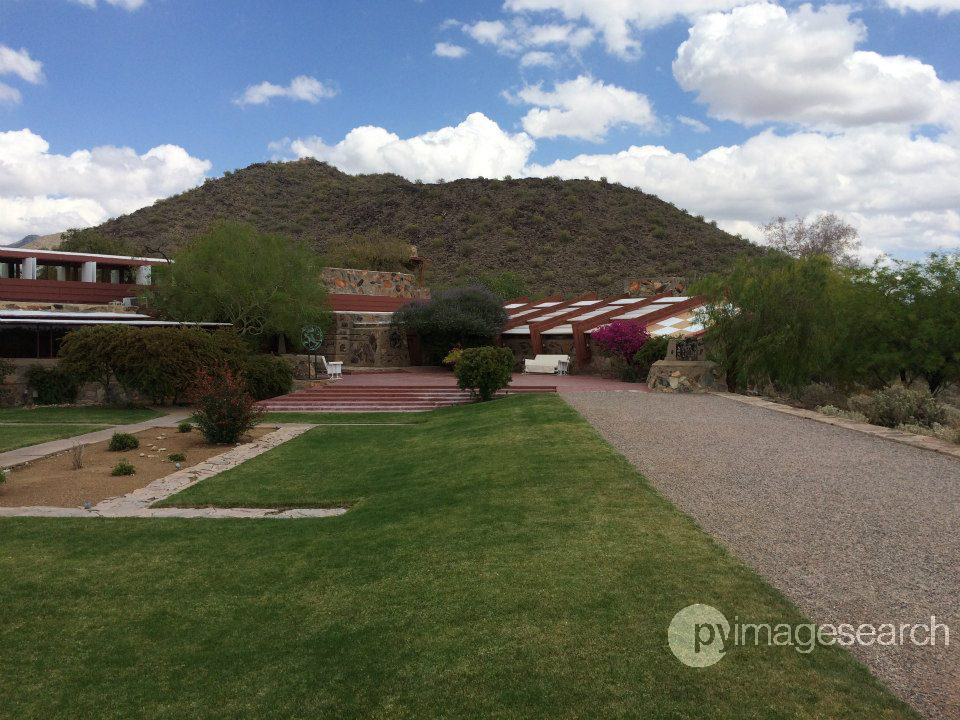

In [25]:
image = cv2.imread('img/watermark/image_01.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(h, w) = image.shape[:2]
image = np.dstack([image, np.ones((h, w), dtype="uint8") * 255])
# construct an overlay that is the same size as the input
# image, (using an extra dimension for the alpha transparency),
# then add the watermark to the overlay in the bottom-right
# corner
overlay = np.zeros((h, w, 4), dtype="uint8")
overlay[h - wH - 50:h - 50, w - wW - 10:w - 10] = watermark
# blend the two images together using transparent overlays
output = image.copy()
alpha = 0.3
cv2.addWeighted(overlay, alpha, output, 1.0, 0, output)
# write the output image to disk


Image.fromarray(output)